In [3]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import Neuron

In [8]:
b1, b2 = (0.5, 1)
beta1, beta2 = (2, 2)
alpha1, alpha2 = (beta1*b1, beta2*b2/(beta1*b1))
print(alpha1, alpha2)

1.0 2.0


In [9]:
arguments = {
    'v0': 0,
    'E0': 1,
    'dt': 0.1,
    'eps': 0.01,
    'win_size': 100,
    'avg_coef': 0.9,
    'energy_coefficient': (alpha1, alpha2),
    'gamma': 10,
    'reset_v': -2,
    'weights_init': np.random.rand(10),
}
N1 = Neuron(**arguments)


In [10]:
in_size = 10
s = 100
N1.weights = np.zeros((in_size, 1))+0.5
test_inputs_ = np.random.randint(0, 2, size=[s*arguments["win_size"], in_size])# np.array([np.ones(in_size) if i%2==0 else np.ones(in_size)/2 for i in range(s*arguments["win_size"])])
vs = []
Es = []
os = []
w_ = []
for i, t in enumerate(np.linspace(0, 1, s*arguments["win_size"])):
    #print(t, test_inputs_.shape)
    test_inputs = test_inputs_[i]#np.where(np.random.rand(in_size, 1)>0.5, 1, 0)
    N1.update_v(test_inputs)
    vs.append(N1.v)
    
    o = N1.fire()
    E = N1.update_energy(N1.outputs_)
    N1.update_weights()
    Es.append(E)
    os.append(o)
    
    w_.append(np.mean(N1.weights))

Text(0.5, 1.0, 'Average Weights')

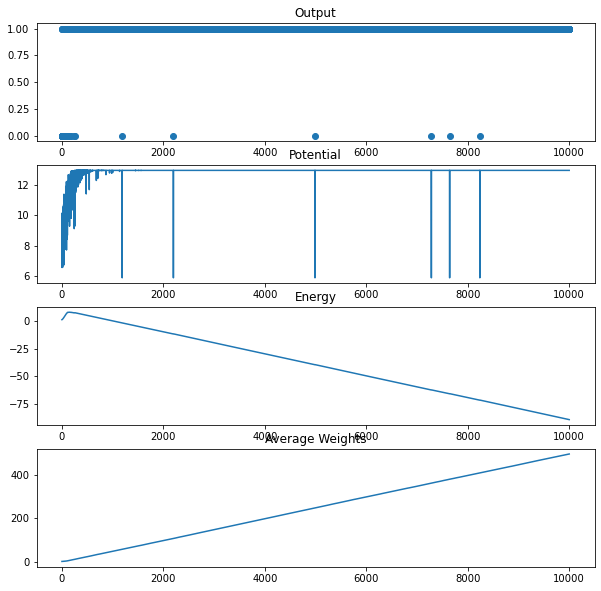

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(4,1,1)
plt.scatter(np.arange(s*arguments["win_size"]), os)
plt.title("Output")
plt.subplot(4,1,2)
plt.plot(np.arange(s*arguments["win_size"]), vs)
plt.title("Potential")
plt.subplot(4,1,3)
plt.plot(np.arange(s*arguments["win_size"]), Es)
plt.title("Energy")
plt.subplot(4,1,4)
plt.plot(np.arange(s*arguments["win_size"]), w_)
plt.title("Average Weights")

In [9]:
arguments = {
    'v0': 0,
    'E0': 1,
    'dt': 0.1,
    'eps': 0.01,
    'win_size': 100,
    'avg_coef': 0.9,
    'energy_coefficient': (alpha1, alpha2),
    'gamma': 10,
    'reset_v': -2,
    'weights_init': np.random.rand(1),
}
in_size = 10
s = 10


In [12]:

N2 = Neuron(**arguments)
N2.weights = np.zeros((in_size+1, 1))-0.5
test_inputs_ = np.random.randint(0, 2, size=[s*arguments["win_size"], in_size])#np.array([np.ones(in_size) if i%2==0 else np.ones(in_size)/2 for i in range(s*arguments["win_size"])])
vs = []
Es = []
os = []
w_ = []
o = np.concatenate((test_inputs_[0].reshape((in_size, 1)), [[0]]), axis=0)
for i, t in enumerate(np.linspace(0, 1, s*arguments["win_size"])):
    N2.update_v(o)
    vs.append(N2.v)
    o_neuron = np.array([[N2.fire()]])
    o = np.concatenate((test_inputs_[i].reshape((in_size, 1)), o_neuron), axis=0)
    E = N2.update_energy(N2.outputs_)
    N2.update_weights()
    Es.append(E)
    os.append(o_neuron)
    w_.append(np.mean(N2.weights))

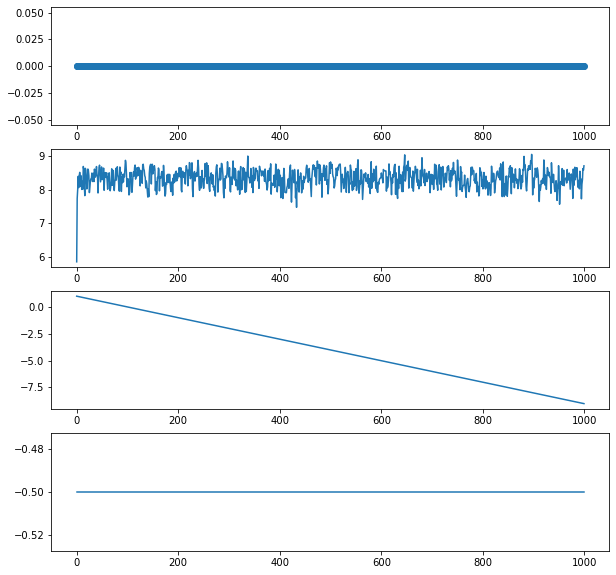

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(4,1,1)
plt.scatter(np.arange(s*arguments["win_size"]), os)
plt.subplot(4,1,2)
plt.plot(np.arange(s*arguments["win_size"]), vs)
plt.subplot(4,1,3)
plt.plot(np.arange(s*arguments["win_size"]), Es)
plt.subplot(4,1,4)
plt.plot(np.arange(s*arguments["win_size"]), w_)

In [2]:
import winsound
import time

ERROR: Could not find a version that satisfies the requirement python-winsound (from versions: none)
ERROR: No matching distribution found for python-winsound


In [ ]:
note_dict = {
    "C": [16.35, 32.70, 65.41, 130.81, 261.63, 523.25, 1046.50, 2093.00, 4186.01],
   "Db":   [17.32, 34.65, 69.30, 138.59, 277.18, 554.37, 1108.73, 2217.46, 4434.92],
    "D":   [18.35, 36.71, 73.42, 146.83, 293.66, 587.33, 1174.66, 2349.32, 4698.64],
   "Eb":   [19.45, 38.89, 77.78, 155.56, 311.13, 622.25, 1244.51, 2489.02, 4978.03],
    "E":   [20.60, 41.20, 82.41, 164.81, 329.63, 659.26, 1318.51, 2637.02],
    "F":   [21.83, 43.65, 87.31, 174.61, 349.23, 698.46, 1396.91, 2793.83],
   "Gb":   [23.12, 46.25, 92.50, 185.00, 369.99, 739.99, 1479.98, 2959.96],
    "G":   [24.50, 49.00, 98.00, 196.00, 392.00, 783.99, 1567.98, 3135.96],
   "Ab":   [25.96, 51.91, 103.83, 207.65, 415.30, 830.61, 1661.22, 3322.44],
    "A":   [27.50, 55.00, 110.00, 220.00, 440.00, 880.00, 1760.00, 3520.00],
   "Bb":   [29.14, 58.27, 116.54, 233.08, 466.16, 932.33, 1864.66, 3729.31],
    "B":   [30.87, 61.74, 123.47, 246.94, 493.88, 987.77, 1975.53, 3951.07]
 }
